# 06_Cash_Flow_Analysis.ipynb

## Title: "Cash Flow Analysis"

### Contents:

- Exploring cash flow data from SEC.
- Comparison with cash_flow_query.sql.
- Cash flow analysis.
- Visual representations and implications.

---

# Set Up the Environment

## Import Libraries

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

## Functions

In [24]:
from prepare_and_sort_data_annually import prepare_and_sort_financial_data

# Load Data

## Load Data from CSV File

In [21]:
raw_data = pd.read_csv('combined_df.csv')

In [25]:
# Inspect the first few rows of the dataset
raw_data.head(5)

,EntityName,CIK,Metric,start,end,val,accn,fy,fp,form,filed,frame
0,THE BOEING COMPANY,12927,NetCashProvidedByUsedInOperatingActivities,2007-01-01,2007-12-31,9584000000,0001193125-10-024406,2009,FY,10-K,2010-02-08,CY2007
1,THE BOEING COMPANY,12927,NetCashProvidedByUsedInOperatingActivities,2008-01-01,2008-06-30,1682000000,0001193125-09-152905,2009,Q2,10-Q,2009-07-22,NaN
2,THE BOEING COMPANY,12927,NetCashProvidedByUsedInOperatingActivities,2008-01-01,2008-09-30,1240000000,0001193125-09-210918,2009,Q3,10-Q,2009-10-21,NaN
3,THE BOEING COMPANY,12927,NetCashProvidedByUsedInOperatingActivities,2008-01-01,2008-12-31,-401000000,0001193125-10-024406,2009,FY,10-K,2010-02-08,NaN
4,THE BOEING COMPANY,12927,NetCashProvidedByUsedInOperatingActivities,2008-01-01,2008-12-31,-401000000,0001193125-11-028490,2010,FY,10-K,2011-02-09,CY2008


In [26]:
# Convert 'end' column to datetime for proper sorting
raw_data['end'] = pd.to_datetime(raw_data['end'], format='%Y-%m-%d')


In [27]:
# Check the data types and look for any missing values
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   EntityName  390 non-null    object        
 1   CIK         390 non-null    int64         
 2   Metric      390 non-null    object        
 3   start       390 non-null    object        
 4   end         390 non-null    datetime64[ns]
 5   val         390 non-null    int64         
 6   accn        390 non-null    object        
 7   fy          390 non-null    int64         
 8   fp          390 non-null    object        
 9   form        390 non-null    object        
 10  filed       390 non-null    object        
 11  frame       93 non-null     object        
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 36.7+ KB


# Individual Metrics Analysis

## Analysis of NetCashProvidedByUsedInOperatingActivities

In [28]:
# Filter out the Assets
operating_activities = raw_data[raw_data['Metric'] == 'NetCashProvidedByUsedInOperatingActivities']

In [29]:
operating_activities = prepare_and_sort_financial_data(raw_data, 'NetCashProvidedByUsedInOperatingActivities')

In [30]:
operating_activities.head(5)

,EntityName,CIK,Metric,start,end,val,year,quarter
0,THE BOEING COMPANY,12927,NetCashProvidedByUsedInOperatingActivities,2007-01-01,2007-12-31,9584000000,2007,5
4,THE BOEING COMPANY,12927,NetCashProvidedByUsedInOperatingActivities,2008-01-01,2008-12-31,-401000000,2008,5
12,THE BOEING COMPANY,12927,NetCashProvidedByUsedInOperatingActivities,2009-01-01,2009-12-31,5603000000,2009,5
21,THE BOEING COMPANY,12927,NetCashProvidedByUsedInOperatingActivities,2010-01-01,2010-12-31,2952000000,2010,5
30,THE BOEING COMPANY,12927,NetCashProvidedByUsedInOperatingActivities,2011-01-01,2011-12-31,4023000000,2011,5


In [31]:
print(operating_activities.describe())

           CIK                  end           val  quarter
count     16.0                   16  1.600000e+01     16.0
mean   12927.0  2015-07-01 18:00:00  4.629562e+09      5.0
min    12927.0  2007-12-31 00:00:00 -1.841000e+10      5.0
25%    12927.0  2011-09-30 18:00:00  2.113750e+09      5.0
50%    12927.0  2015-07-01 12:00:00  6.555500e+09      5.0
75%    12927.0  2019-04-01 06:00:00  9.418250e+09      5.0
max    12927.0  2022-12-31 00:00:00  1.532200e+10      5.0
std        0.0                  NaN  8.110637e+09      0.0


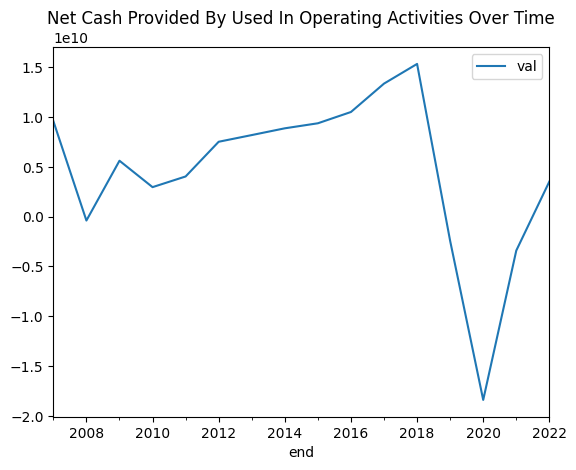

In [32]:
operating_activities.plot(x='end', y='val', title='Net Cash Provided By Used In Operating Activities Over Time')
plt.show()

## Analysis of NetCashProvidedByUsedInInvestingActivities 

In [33]:
investing_activities = raw_data[raw_data['Metric'] == 'NetCashProvidedByUsedInInvestingActivities']

In [34]:
investing_activities = prepare_and_sort_financial_data(raw_data, 'NetCashProvidedByUsedInInvestingActivities')

In [35]:
investing_activities.head(5)

,EntityName,CIK,Metric,start,end,val,year,quarter
130,THE BOEING COMPANY,12927,NetCashProvidedByUsedInInvestingActivities,2007-01-01,2007-12-31,-3822000000,2007,5
134,THE BOEING COMPANY,12927,NetCashProvidedByUsedInInvestingActivities,2008-01-01,2008-12-31,1888000000,2008,5
142,THE BOEING COMPANY,12927,NetCashProvidedByUsedInInvestingActivities,2009-01-01,2009-12-31,-3794000000,2009,5
151,THE BOEING COMPANY,12927,NetCashProvidedByUsedInInvestingActivities,2010-01-01,2010-12-31,-4831000000,2010,5
160,THE BOEING COMPANY,12927,NetCashProvidedByUsedInInvestingActivities,2011-01-01,2011-12-31,2369000000,2011,5


           CIK                  end           val  quarter
count     16.0                   16  1.600000e+01     16.0
mean   12927.0  2015-07-01 18:00:00 -2.046188e+09      5.0
min    12927.0  2007-12-31 00:00:00 -1.836600e+10      5.0
25%    12927.0  2011-09-30 18:00:00 -4.021750e+09      5.0
50%    12927.0  2015-07-01 12:00:00 -2.718000e+09      5.0
75%    12927.0  2019-04-01 06:00:00  2.008250e+09      5.0
max    12927.0  2022-12-31 00:00:00  9.324000e+09      5.0
std        0.0                  NaN  5.929499e+09      0.0


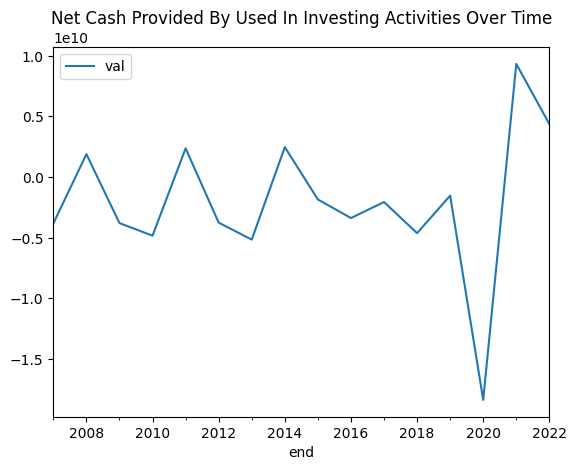

In [36]:
print(investing_activities.describe())
investing_activities.plot(x='end', y='val', title='Net Cash Provided By Used In Investing Activities Over Time')
plt.show()


## Analysis of NetCashProvidedByUsedInFinancingActivities

In [37]:
# Filter out the Liabilities data
financing_activities = raw_data[raw_data['Metric'] == 'NetCashProvidedByUsedInFinancingActivities']

In [38]:
financing_activities = prepare_and_sort_financial_data(raw_data, 'NetCashProvidedByUsedInFinancingActivities')

In [39]:
financing_activities.head()

,EntityName,CIK,Metric,start,end,val,year,quarter
260,THE BOEING COMPANY,12927,NetCashProvidedByUsedInFinancingActivities,2007-01-01,2007-12-31,-4884000000,2007,5
264,THE BOEING COMPANY,12927,NetCashProvidedByUsedInFinancingActivities,2008-01-01,2008-12-31,-5202000000,2008,5
272,THE BOEING COMPANY,12927,NetCashProvidedByUsedInFinancingActivities,2009-01-01,2009-12-31,4094000000,2009,5
281,THE BOEING COMPANY,12927,NetCashProvidedByUsedInFinancingActivities,2010-01-01,2010-12-31,-1962000000,2010,5
290,THE BOEING COMPANY,12927,NetCashProvidedByUsedInFinancingActivities,2011-01-01,2011-12-31,-1700000000,2011,5


           CIK                  end           val  quarter
count     16.0                   16  1.600000e+01     16.0
mean   12927.0  2015-07-01 18:00:00 -2.045250e+09      5.0
min    12927.0  2007-12-31 00:00:00 -1.172200e+10      5.0
25%    12927.0  2011-09-30 18:00:00 -8.088250e+09      5.0
50%    12927.0  2015-07-01 12:00:00 -4.566500e+09      5.0
75%    12927.0  2019-04-01 06:00:00 -1.591500e+09      5.0
max    12927.0  2022-12-31 00:00:00  3.495500e+10      5.0
std        0.0                  NaN  1.101540e+10      0.0


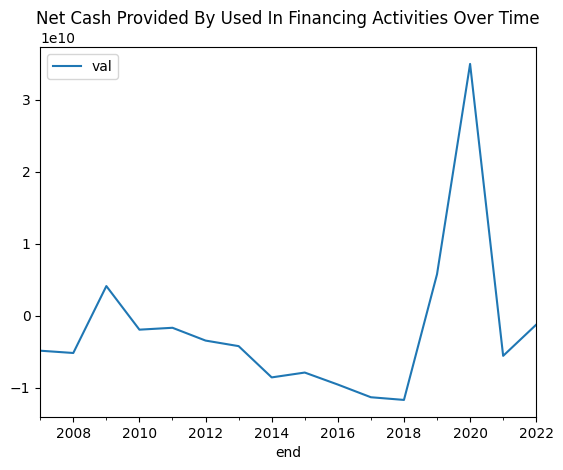

In [40]:
print(financing_activities.describe())
financing_activities.plot(x='end', y='val', title='Net Cash Provided By Used In Financing Activities Over Time')
plt.show()


# Merge the Data

In [41]:
df_merged = pd.merge(operating_activities, investing_activities, 
                     on=['EntityName', 'CIK', 'end', 'year', 'quarter'], 
                     how='outer', suffixes=('_operating', '_investing'))

In [42]:
df_merged = pd.merge(df_merged, financing_activities, 
                     on=['EntityName', 'CIK', 'end', 'year', 'quarter'], 
                     how='outer')
                     

In [43]:
df_merged.rename(columns={'val_operating': 'Operating', 
                          'val_investing': 'Investing', 
                          'val': 'Financing'}, inplace=True)

In [44]:
# Filtering out the annual data (rows where quarter is '5')
#df_merged_quarterly = df_merged[df_merged['quarter']] #!= 5]

In [46]:
df_merged.head(5)

,EntityName,CIK,Metric_operating,start_operating,end,Operating,year,quarter,Metric_investing,start_investing,Investing,Metric,start,Financing
0,THE BOEING COMPANY,12927,NetCashProvidedByUsedInOperatingActivities,2007-01-01,2007-12-31,9584000000,2007,5,NetCashProvidedByUsedInInvestingActivities,2007-01-01,-3822000000,NetCashProvidedByUsedInFinancingActivities,2007-01-01,-4884000000
1,THE BOEING COMPANY,12927,NetCashProvidedByUsedInOperatingActivities,2008-01-01,2008-12-31,-401000000,2008,5,NetCashProvidedByUsedInInvestingActivities,2008-01-01,1888000000,NetCashProvidedByUsedInFinancingActivities,2008-01-01,-5202000000
2,THE BOEING COMPANY,12927,NetCashProvidedByUsedInOperatingActivities,2009-01-01,2009-12-31,5603000000,2009,5,NetCashProvidedByUsedInInvestingActivities,2009-01-01,-3794000000,NetCashProvidedByUsedInFinancingActivities,2009-01-01,4094000000
3,THE BOEING COMPANY,12927,NetCashProvidedByUsedInOperatingActivities,2010-01-01,2010-12-31,2952000000,2010,5,NetCashProvidedByUsedInInvestingActivities,2010-01-01,-4831000000,NetCashProvidedByUsedInFinancingActivities,2010-01-01,-1962000000
4,THE BOEING COMPANY,12927,NetCashProvidedByUsedInOperatingActivities,2011-01-01,2011-12-31,4023000000,2011,5,NetCashProvidedByUsedInInvestingActivities,2011-01-01,2369000000,NetCashProvidedByUsedInFinancingActivities,2011-01-01,-1700000000


# Calculation

 **Cash Flow:**
    
    - `NetCashProvidedByUsedInOperatingActivities`
    - `NetCashProvidedByUsedInInvestingActivities`
    - `NetCashProvidedByUsedInFinancingActivities`
    - **Calculation:** Analyze the sources of cash flow (operations, investing, financing) to understand cash management.

In [47]:
# Start by creating a copy of the DataFrame to avoid SettingWithCopyWarning
df_final = df_merged.copy()

In [48]:
# Convert financial values from cents to millions for readability
df_final['Financing'] /= 1000000
df_final['Investing'] /= 1000000
df_final['Operating'] /= 1000000

In [49]:
# Calculate Total Cash Flow
df_final['TotalCashFlow'] = df_final.apply(lambda row: 
                                           row['Operating'] + row['Investing'] + row['Financing']
                                           if pd.notna(row['Operating']) and pd.notna(row['Investing']) and pd.notna(row['Financing']) 
                                           else None, axis=1)

In [50]:
# Calculate each cash flow component as a percentage of total cash flow where data is available
df_final['OperatingPercent'] = df_final.apply(lambda row: 
                                              (row['Operating'] / row['TotalCashFlow']) * 100 
                                              if pd.notna(row['Operating']) and pd.notna(row['TotalCashFlow']) and row['TotalCashFlow'] != 0 
                                              else None, axis=1)

df_final['InvestingPercent'] = df_final.apply(lambda row: 
                                              (row['Investing'] / row['TotalCashFlow']) * 100 
                                              if pd.notna(row['Investing']) and pd.notna(row['TotalCashFlow']) and row['TotalCashFlow'] != 0 
                                              else None, axis=1)

df_final['FinancingPercent'] = df_final.apply(lambda row: 
                                              (row['Financing'] / row['TotalCashFlow']) * 100 
                                              if pd.notna(row['Financing']) and pd.notna(row['TotalCashFlow']) and row['TotalCashFlow'] != 0 
                                              else None, axis=1)

In [51]:
# Construct the 'Quarter' column
df_final['Quarter'] = df_final['year'].astype(str) + '-Q' + df_final['quarter'].astype(str)

In [52]:
# Selecting and renaming columns to match the desired format
df_final = df_final[['EntityName', 'CIK', 'end', 'Operating', 'Investing', 'Financing', 'TotalCashFlow', 'OperatingPercent', 'InvestingPercent', 'FinancingPercent', 'Quarter']]


In [53]:
df_copy = df_final.copy()
df_copy.rename(columns={'EntityName': 'ENTITY', 'end': 'DATE'}, inplace=True)

In [54]:
df_copy.head(5)

,ENTITY,CIK,DATE,Operating,Investing,Financing,TotalCashFlow,OperatingPercent,InvestingPercent,FinancingPercent,Quarter
0,THE BOEING COMPANY,12927,2007-12-31,9584.0,-3822.0,-4884.0,878.0,1091.571754,-435.307517,-556.264237,2007-Q5
1,THE BOEING COMPANY,12927,2008-12-31,-401.0,1888.0,-5202.0,-3715.0,10.794078,-50.820996,140.026918,2008-Q5
2,THE BOEING COMPANY,12927,2009-12-31,5603.0,-3794.0,4094.0,5903.0,94.917838,-64.272404,69.354565,2009-Q5
3,THE BOEING COMPANY,12927,2010-12-31,2952.0,-4831.0,-1962.0,-3841.0,-76.854986,125.774538,51.080448,2010-Q5
4,THE BOEING COMPANY,12927,2011-12-31,4023.0,2369.0,-1700.0,4692.0,85.741688,50.490196,-36.231884,2011-Q5


# Visualization

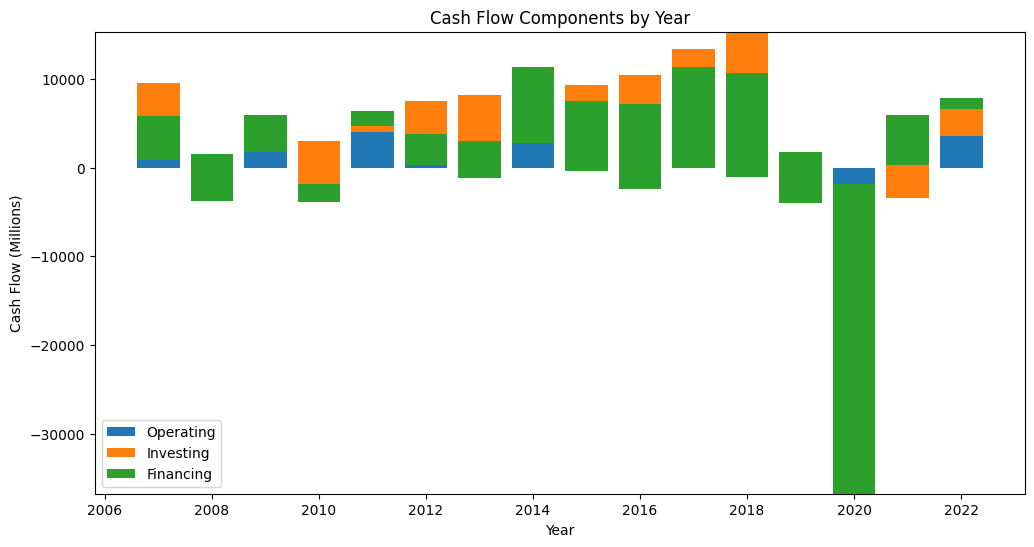

In [55]:
#Cash Flow Bar Chart
plt.figure(figsize=(12, 6))
plt.bar(df_copy['DATE'].dt.year, df_copy['Operating'], label='Operating')
plt.bar(df_copy['DATE'].dt.year, df_copy['Investing'], bottom=df_copy['Operating'], label='Investing')
plt.bar(df_copy['DATE'].dt.year, df_copy['Financing'], bottom=df_copy['Operating'] + df_copy['Investing'], label='Financing')
plt.xlabel('Year')
plt.ylabel('Cash Flow (Millions)')
plt.title('Cash Flow Components by Year')
plt.legend()
plt.show()


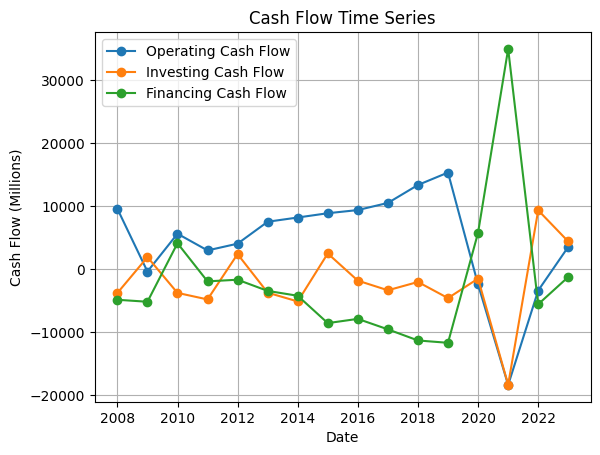

In [34]:
#Cash Flow Time Series
plt.plot(df_copy['DATE'], df_copy['Operating'], label='Operating Cash Flow', marker='o')
plt.plot(df_copy['DATE'], df_copy['Investing'], label='Investing Cash Flow', marker='o')
plt.plot(df_copy['DATE'], df_copy['Financing'], label='Financing Cash Flow', marker='o')

plt.title('Cash Flow Time Series')
plt.xlabel('Date')
plt.ylabel('Cash Flow (Millions)')
plt.legend()
plt.grid(True)
plt.show()


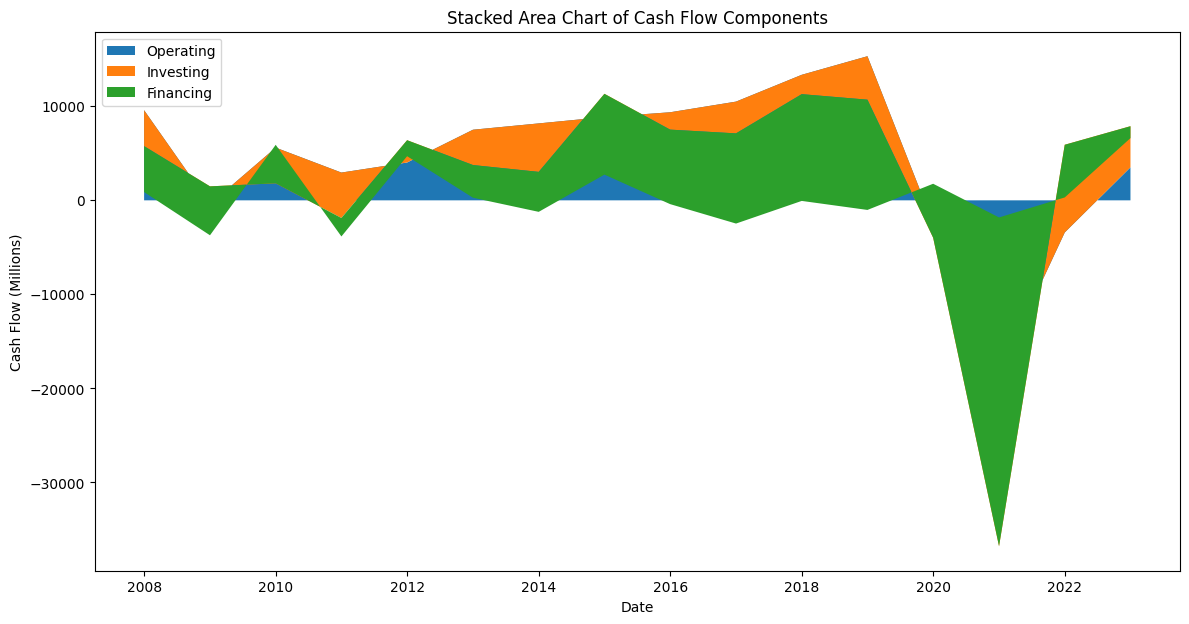

In [35]:
#Stacked Area Char of Cash Flow
plt.figure(figsize=(14, 7))
plt.stackplot(df_copy['DATE'], df_copy['Operating'], df_copy['Investing'], df_copy['Financing'], labels=['Operating', 'Investing', 'Financing'])
plt.title('Stacked Area Chart of Cash Flow Components')
plt.xlabel('Date')
plt.ylabel('Cash Flow (Millions)')
plt.legend(loc='upper left')
plt.show()


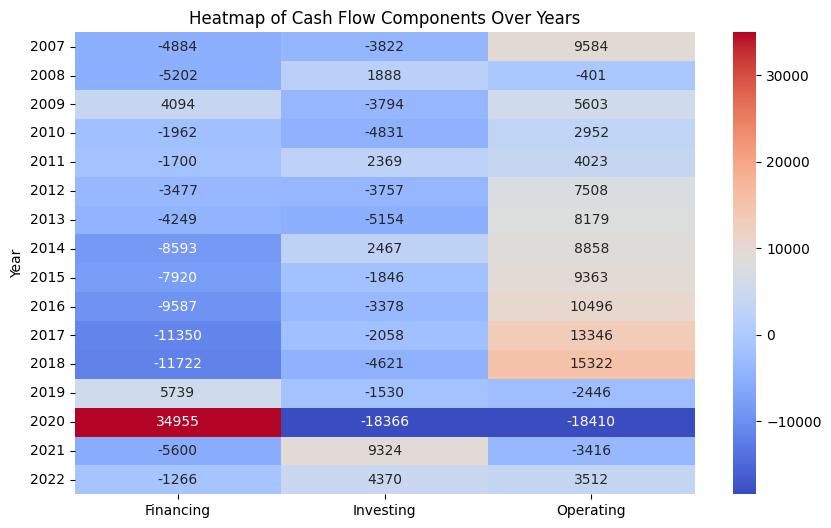

In [36]:
#Heatmap of Cash Flow Time Series
pivot_df = df_copy.pivot_table(index=df_copy['DATE'].dt.year, 
                                values=['Operating', 'Investing', 'Financing'], 
                                aggfunc='sum')

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_df, annot=True, fmt='.0f', cmap='coolwarm')
plt.title('Heatmap of Cash Flow Components Over Years')
plt.ylabel('Year')
plt.show()


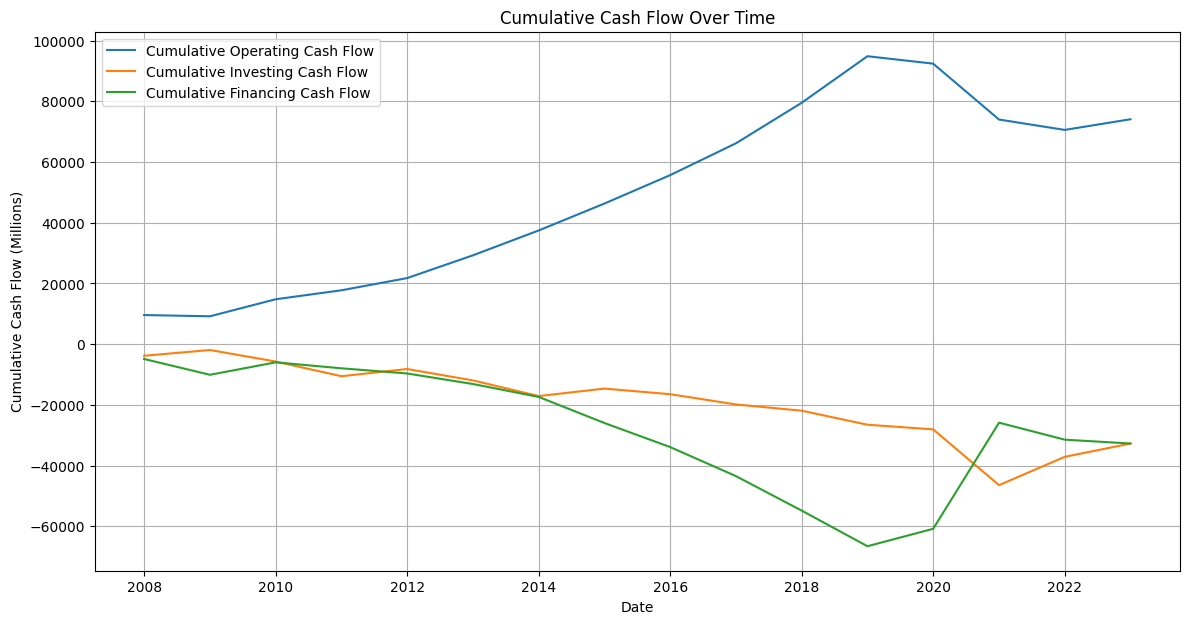

In [37]:
#Cumulative Cash Flow Time Series
plt.figure(figsize=(14, 7))
plt.plot(df_copy['DATE'], df_copy['Operating'].cumsum(), label='Cumulative Operating Cash Flow')
plt.plot(df_copy['DATE'], df_copy['Investing'].cumsum(), label='Cumulative Investing Cash Flow')
plt.plot(df_copy['DATE'], df_copy['Financing'].cumsum(), label='Cumulative Financing Cash Flow')
plt.title('Cumulative Cash Flow Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Cash Flow (Millions)')
plt.legend()
plt.grid(True)
plt.show()


In [57]:
#Interactive Cumulative Cash Flow Chart
from plotly.subplots import make_subplots
import plotly.graph_objs as go

# Create a cumulative sum for each cash flow type
df_copy['CumulativeOperating'] = df_copy['Operating'].cumsum()
df_copy['CumulativeInvesting'] = df_copy['Investing'].cumsum()
df_copy['CumulativeFinancing'] = df_copy['Financing'].cumsum()

# Create subplots
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces for each cash flow type
fig.add_trace(go.Scatter(x=df_copy['DATE'], y=df_copy['CumulativeOperating'], name='Cumulative Operating Cash Flow', mode='lines+markers'), secondary_y=False)
fig.add_trace(go.Scatter(x=df_copy['DATE'], y=df_copy['CumulativeInvesting'], name='Cumulative Investing Cash Flow', mode='lines+markers'), secondary_y=False)
fig.add_trace(go.Scatter(x=df_copy['DATE'], y=df_copy['CumulativeFinancing'], name='Cumulative Financing Cash Flow', mode='lines+markers'), secondary_y=False)

# Add plot titles and labels
fig.update_layout(title_text='Interactive Cumulative Cash Flow Chart', xaxis_title='Date', yaxis_title='Cumulative Cash Flow (Millions)')
fig.update_xaxes(rangeslider_visible=True)

# Show plot
fig.show()


In [61]:
# Interactive dashboard 
import dash
from dash.dependencies import Input, Output
from dash import dcc, html

df_copy['DATE'] = pd.to_datetime(df_copy['DATE'])
df_copy.sort_values(by='DATE', inplace=True)

app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("Cash Flow Dashboard"),
    html.Label("Select Year:"),
    dcc.Slider(
        id='year-slider',
        min=df_copy['DATE'].dt.year.min(),
        max=df_copy['DATE'].dt.year.max(),
        value=df_copy['DATE'].dt.year.max(),
        marks={str(year): str(year) for year in df_copy['DATE'].dt.year.unique()},
        step=None
    ),
    dcc.Graph(id='cumulative-cash-flow-chart'),
    dcc.Graph(id='yearly-breakdown-chart'),
    dcc.Graph(id='cash-flow-distribution-pie-chart')
])

@app.callback(
    [Output('cumulative-cash-flow-chart', 'figure'),
     Output('yearly-breakdown-chart', 'figure'),
     Output('cash-flow-distribution-pie-chart', 'figure')],
    [Input('year-slider', 'value')])
def update_charts(selected_year):
    filtered_df = df_copy[df_copy['DATE'].dt.year == selected_year]

    # Cumulative Cash Flow Chart
    cum_fig = go.Figure()
    cum_fig.add_trace(go.Scatter(x=df_copy['DATE'], y=df_copy['Operating'].cumsum(), mode='lines', name='Cumulative Operating'))
    cum_fig.add_trace(go.Scatter(x=df_copy['DATE'], y=df_copy['Investing'].cumsum(), mode='lines', name='Cumulative Investing'))
    cum_fig.add_trace(go.Scatter(x=df_copy['DATE'], y=df_copy['Financing'].cumsum(), mode='lines', name='Cumulative Financing'))
    cum_fig.update_layout(title='Cumulative Cash Flow Over Time', xaxis_title='Date', yaxis_title='Cumulative Cash Flow')

    # Yearly Breakdown Chart
    yearly_fig = go.Figure(data=[
        go.Bar(name='Operating', x=[selected_year], y=[filtered_df['Operating'].sum()]),
        go.Bar(name='Investing', x=[selected_year], y=[filtered_df['Investing'].sum()]),
        go.Bar(name='Financing', x=[selected_year], y=[filtered_df['Financing'].sum()])
    ])
    yearly_fig.update_layout(barmode='group', title='Cash Flow Breakdown in ' + str(selected_year))

    # Pie Chart for Cash Flow Distribution
    labels = ['Operating', 'Investing', 'Financing']
    values = [filtered_df['Operating'].sum(), filtered_df['Investing'].sum(), filtered_df['Financing'].sum()]
    # Filter out negative values for the pie chart
    positive_values = [v for v in values if v > 0]
    positive_labels = [labels[i] for i, v in enumerate(values) if v > 0]
    # Check if there are any positive values to plot
    if positive_values:
        pie_fig = go.Figure(data=[go.Pie(labels=positive_labels, values=positive_values)])
        pie_fig.update_layout(title='Cash Flow Distribution in ' + str(selected_year))
    else:
        pie_fig.update_layout(title='Cash Flow Distribution in ' + str(selected_year),
                              annotations=[{"text": "No positive cash flow components to display", "x": 0.5, "y": 0.5, "showarrow": False}])

    return cum_fig, yearly_fig, pie_fig

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)
